In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

/Users/subhojit/workspace/saturn/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/subhojit/workspace/saturn/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
texts = [
    "Amazon delivery was late again.",
    "Prime shipping is super fast!",
    "I love my new Kindle.",
    "Alexa, play some music.",
    "Terrible experience with customer service.",
    "Got a refund in 2 days. Great support!",
    "Why is my package delayed?",
    "Prime Video has great shows.",
    "Alexa is not responding today.",
    "I got my product earlier than expected!"
    "Prime shipping is so fast, I love Amazon over the other online services",
]

In [19]:
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)

In [24]:
db = DBSCAN(eps=1.0, min_samples=2)
labels = db.fit_predict(embeddings)

In [25]:
for text, label in zip(texts, labels):
    print(f"Cluster {label}: {text}")

Cluster 0: Amazon delivery was late again.
Cluster 0: Prime shipping is super fast!
Cluster -1: I love my new Kindle.
Cluster 1: Alexa, play some music.
Cluster -1: Terrible experience with customer service.
Cluster -1: Got a refund in 2 days. Great support!
Cluster 0: Why is my package delayed?
Cluster -1: Prime Video has great shows.
Cluster 1: Alexa is not responding today.
Cluster 0: I got my product earlier than expected!Prime shipping is so fast, I love Amazon over the other online services


In [26]:
mask = labels != -1
if np.sum(mask) > 1 and len(set(labels[mask])) > 1:
    score = silhouette_score(embeddings[mask], labels[mask], metric='cosine')
    print(f"\nSilhouette Score: {score:.3f}")
else:
    print("\nNot enough clustered points for silhouette score.")


Silhouette Score: 0.479


In [27]:
def euclidian_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

euclidian_distance(embeddings[0], embeddings[2])

1.2518224

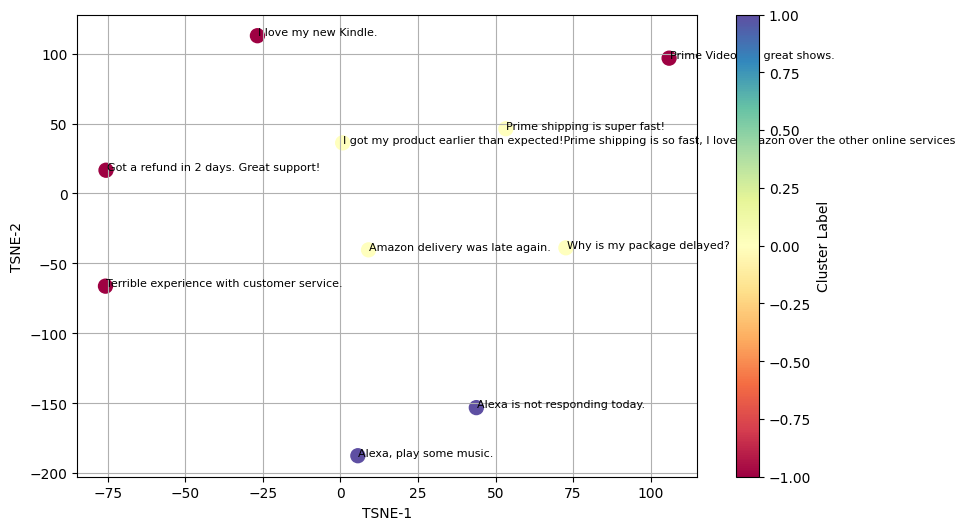

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='Spectral', s=100)

for i, text in enumerate(texts):
    plt.annotate(text, (embeddings_2d[i, 0] + 0.2, embeddings_2d[i, 1]), fontsize=8)

plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.colorbar(scatter, label="Cluster Label")
plt.show()